# importing libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing Data sets

In [3]:
#Movie data 

In [4]:
movies = pd.read_csv("C:\\Users\\hp\\Downloads\\movies.dat", sep='::', engine='python',encoding='latin1')
movies.dropna(inplace=True)
movies.head()

,1,Toy Story (1995),Animation|Children's|Comedy
0,2,Jumanji (1995),Adventure|Children's|Fantasy
1,3,Grumpier Old Men (1995),Comedy|Romance
2,4,Waiting to Exhale (1995),Comedy|Drama
3,5,Father of the Bride Part II (1995),Comedy
4,6,Heat (1995),Action|Crime|Thriller


In [5]:
movies.columns =["MovieIDs", "MovieName", "Genre"]
movies

,MovieIDs,MovieName,Genre
0,2,Jumanji (1995),Adventure|Children's|Fantasy
1,3,Grumpier Old Men (1995),Comedy|Romance
2,4,Waiting to Exhale (1995),Comedy|Drama
3,5,Father of the Bride Part II (1995),Comedy
4,6,Heat (1995),Action|Crime|Thriller
...,...,...,...
3877,3948,Meet the Parents (2000),Comedy
3878,3949,Requiem for a Dream (2000),Drama
3879,3950,Tigerland (2000),Drama
3880,3951,Two Family House (2000),Drama


In [6]:
movies.shape

(3882, 3)

In [7]:
movies.describe()

,MovieIDs
count,3882.000000
mean,1986.560793
std,1146.483260
min,2.000000
25%,983.250000
50%,2010.500000
75%,2980.750000
max,3952.000000


In [8]:
movies.isna().sum()

MovieIDs     0
MovieName    0
Genre        0
dtype: int64

In [9]:
#Rating data

In [10]:
rating = pd.read_csv("C:\\Users\\hp\\Downloads\\ratings.dat\\ratings.dat", sep='::', engine='python',encoding='latin1')
rating.dropna(inplace=True)
rating.head()

,1,1193,5,978300760
0,1,661,3,978302109
1,1,914,3,978301968
2,1,3408,4,978300275
3,1,2355,5,978824291
4,1,1197,3,978302268


In [11]:
rating.columns =['ID','MovieID','Ratings','TimeStamp']
rating.head()

,ID,MovieID,Ratings,TimeStamp
0,1,661,3,978302109
1,1,914,3,978301968
2,1,3408,4,978300275
3,1,2355,5,978824291
4,1,1197,3,978302268


In [12]:
rating.shape

(1000208, 4)

In [13]:
rating.isna().sum()

ID           0
MovieID      0
Ratings      0
TimeStamp    0
dtype: int64

In [14]:
#user data

In [15]:
users = pd.read_csv("C:\\Users\\hp\\Downloads\\users.dat", sep='::', engine='python',encoding='latin1')
users.dropna(inplace=True)
users.head()

,1,F,1.1,10,48067
0,2,M,56,16,70072
1,3,M,25,15,55117
2,4,M,45,7,02460
3,5,M,25,20,55455
4,6,F,50,9,55117


In [16]:
users.columns =['UserID','Gender','Age','Occupation','Zip-code']
users.head()

,UserID,Gender,Age,Occupation,Zip-code
0,2,M,56,16,70072
1,3,M,25,15,55117
2,4,M,45,7,02460
3,5,M,25,20,55455
4,6,F,50,9,55117


In [17]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

users['Gender'] = labelencoder.fit_transform(users['Gender'])
users.head()

,UserID,Gender,Age,Occupation,Zip-code
0,2,1,56,16,70072
1,3,1,25,15,55117
2,4,1,45,7,02460
3,5,1,25,20,55455
4,6,0,50,9,55117


In [18]:
users.shape

(6039, 5)

In [19]:
users.describe()

,UserID,Gender,Age,Occupation
count,6039.000000,6039.000000,6039.000000,6039.000000
mean,3021.000000,0.717172,30.644146,8.146547
std,1743.453469,0.450411,12.891387,6.329991
min,2.000000,0.000000,1.000000,0.000000
25%,1511.500000,0.000000,25.000000,3.000000
50%,3021.000000,1.000000,25.000000,7.000000
75%,4530.500000,1.000000,35.000000,14.000000
max,6040.000000,1.000000,56.000000,20.000000


In [20]:
users.isna().sum()

UserID        0
Gender        0
Age           0
Occupation    0
Zip-code      0
dtype: int64

In [21]:
#Concatenating the Datasets

In [22]:
df_data = pd.concat([movies,rating,users], axis=1)
df_data.dropna()
df_data.head(10)

,MovieIDs,MovieName,Genre,ID,MovieID,Ratings,TimeStamp,UserID,Gender,Age,Occupation,Zip-code
0,2.0,Jumanji (1995),Adventure|Children's|Fantasy,1,661,3,978302109,2.0,1.0,56.0,16.0,70072
1,3.0,Grumpier Old Men (1995),Comedy|Romance,1,914,3,978301968,3.0,1.0,25.0,15.0,55117
2,4.0,Waiting to Exhale (1995),Comedy|Drama,1,3408,4,978300275,4.0,1.0,45.0,7.0,02460
3,5.0,Father of the Bride Part II (1995),Comedy,1,2355,5,978824291,5.0,1.0,25.0,20.0,55455
4,6.0,Heat (1995),Action|Crime|Thriller,1,1197,3,978302268,6.0,0.0,50.0,9.0,55117
5,7.0,Sabrina (1995),Comedy|Romance,1,1287,5,978302039,7.0,1.0,35.0,1.0,06810
6,8.0,Tom and Huck (1995),Adventure|Children's,1,2804,5,978300719,8.0,1.0,25.0,12.0,11413
7,9.0,Sudden Death (1995),Action,1,594,4,978302268,9.0,1.0,25.0,17.0,61614
8,10.0,GoldenEye (1995),Action|Adventure|Thriller,1,919,4,978301368,10.0,0.0,35.0,1.0,95370
9,11.0,"American President, The (1995)",Comedy|Drama|Romance,1,595,5,978824268,11.0,0.0,25.0,1.0,04093


In [23]:
df_data.shape

(1000208, 12)

In [24]:
#Removing unnecessary columns

In [25]:
df2 = df_data.drop(["Occupation","Zip-code","TimeStamp"],axis=1)
df2.head()

,MovieIDs,MovieName,Genre,ID,MovieID,Ratings,UserID,Gender,Age
0,2.0,Jumanji (1995),Adventure|Children's|Fantasy,1,661,3,2.0,1.0,56.0
1,3.0,Grumpier Old Men (1995),Comedy|Romance,1,914,3,3.0,1.0,25.0
2,4.0,Waiting to Exhale (1995),Comedy|Drama,1,3408,4,4.0,1.0,45.0
3,5.0,Father of the Bride Part II (1995),Comedy,1,2355,5,5.0,1.0,25.0
4,6.0,Heat (1995),Action|Crime|Thriller,1,1197,3,6.0,0.0,50.0


In [26]:
df2.describe()

,MovieIDs,ID,MovieID,Ratings,UserID,Gender,Age
count,3882.000000,1.000208e+06,1.000208e+06,1.000208e+06,6039.000000,6039.000000,6039.000000
mean,1986.560793,3.024515e+03,1.865541e+03,3.581563e+00,3021.000000,0.717172,30.644146
std,1146.483260,1.728411e+03,1.096041e+03,1.117102e+00,1743.453469,0.450411,12.891387
min,2.000000,1.000000e+00,1.000000e+00,1.000000e+00,2.000000,0.000000,1.000000
25%,983.250000,1.506000e+03,1.030000e+03,3.000000e+00,1511.500000,0.000000,25.000000
50%,2010.500000,3.070000e+03,1.835000e+03,4.000000e+00,3021.000000,1.000000,25.000000
75%,2980.750000,4.476000e+03,2.770000e+03,4.000000e+00,4530.500000,1.000000,35.000000
max,3952.000000,6.040000e+03,3.952000e+03,5.000000e+00,6040.000000,1.000000,56.000000


In [27]:
df2.isna().sum()

MovieIDs     996326
MovieName    996326
Genre        996326
ID                0
MovieID           0
Ratings           0
UserID       994169
Gender       994169
Age          994169
dtype: int64

In [28]:
#handling Missing Values

In [29]:
df_final=df2.dropna()

In [30]:
df_final.shape

(3882, 9)

In [31]:
#visualizing the preprocessed data

<AxesSubplot:xlabel='Gender', ylabel='count'>

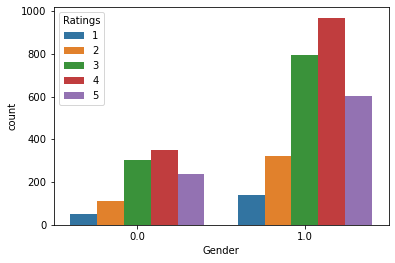

In [32]:
sns.countplot(x= df_final['Gender'],hue=df_final['Ratings'])

Text(0.5, 0, 'Ratings')

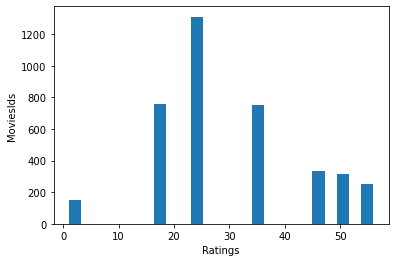

In [33]:
df_final.Age.plot.hist(bins=25)
plt.ylabel('MoviesIds')
plt.xlabel('Ratings')

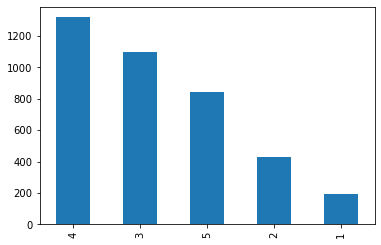

In [34]:
df_final['Ratings'].value_counts().plot(kind='bar')
plt.show()

Text(0, 0.5, 'Ratings')

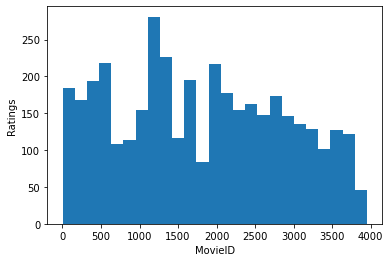

In [36]:
df_final['MovieID'].plot.hist(bins=25)
plt.xlabel('MovieID')
plt.ylabel('Ratings')

Text(0, 0.5, 'Age')

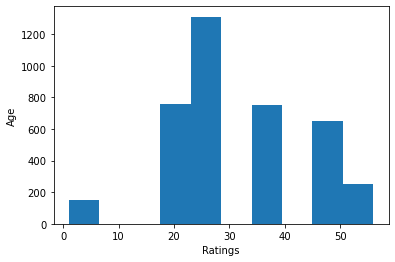

In [37]:
df_final['Age'].plot.hist(bins=10)
plt.xlabel('Ratings')
plt.ylabel('Age')

<AxesSubplot:xlabel='Age', ylabel='count'>

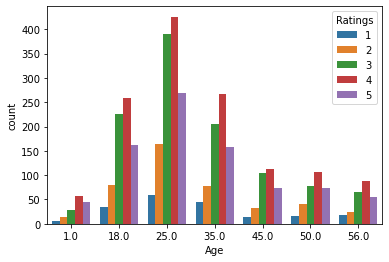

In [39]:
sns.countplot(x=df_final['Age'],hue=df_final['Ratings'])

In [40]:
#final dataset

In [41]:
df_final.head()

,MovieIDs,MovieName,Genre,ID,MovieID,Ratings,UserID,Gender,Age
0,2.0,Jumanji (1995),Adventure|Children's|Fantasy,1,661,3,2.0,1.0,56.0
1,3.0,Grumpier Old Men (1995),Comedy|Romance,1,914,3,3.0,1.0,25.0
2,4.0,Waiting to Exhale (1995),Comedy|Drama,1,3408,4,4.0,1.0,45.0
3,5.0,Father of the Bride Part II (1995),Comedy,1,2355,5,5.0,1.0,25.0
4,6.0,Heat (1995),Action|Crime|Thriller,1,1197,3,6.0,0.0,50.0


In [43]:
input=df_final.drop(['Ratings','MovieName','Genre','MovieIDs'],axis=1)
target=df_final['Ratings']

In [44]:
target.head()

0    3
1    3
2    4
3    5
4    3
Name: Ratings, dtype: int64

In [45]:
input.head()

,ID,MovieID,UserID,Gender,Age
0,1,661,2.0,1.0,56.0
1,1,914,3.0,1.0,25.0
2,1,3408,4.0,1.0,45.0
3,1,2355,5.0,1.0,25.0
4,1,1197,6.0,0.0,50.0


In [46]:
#training the model using logistic regression

In [47]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(input)
scaled_df = pd.DataFrame(scaled_data,columns=input.columns)
scaled_df.head()

,ID,MovieID,UserID,Gender,Age
0,0.0,0.167046,0.000000,1.0,1.000000
1,0.0,0.231081,0.000258,1.0,0.436364
2,0.0,0.862313,0.000515,1.0,0.800000
3,0.0,0.595799,0.000773,1.0,0.436364
4,0.0,0.302708,0.001031,0.0,0.890909


In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(input,target,test_size=0.3)

In [54]:
print(Y_train)

440     2
3630    2
2333    4
2283    4
1713    3
       ..
1823    5
59      3
3643    2
602     5
3206    4
Name: Ratings, Length: 2717, dtype: int64


In [55]:
print(Y_test)

3077    5
316     3
669     4
3266    4
1494    2
       ..
2522    4
3804    5
1347    2
2890    1
3203    3
Name: Ratings, Length: 1165, dtype: int64


In [56]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,Y_train)

C:\Users\hp\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [57]:
X_test = np.array(X_test)

In [58]:
#model prediction

In [59]:
model.predict(X_test)

C:\Users\hp\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([3, 4, 4, ..., 4, 4, 4], dtype=int64)